In [42]:
import scipy.io
import numpy as np
import pylab as pl
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
data = pd.read_csv('elo7_recruitment_dataset.csv')
data.head(5)


,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [43]:
data.tail(5)

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
38502,16561714,9813770,nossa senhora de perolas,1,7,Imagem Nossa Senhora Aparecida em Perolas 25cm,senhora aparecida bebe perolas,2018-04-02 19:43:07,71.20,706.0,1,4,315,15.0,Decoração
38503,12716324,6483096,lembrancinha personalizada dia dos pais,1,27,LEMBRANCINHA - DIA DOS PAIS,lembrancinhas,2018-07-10 11:41:08,14.65,7.0,1,26,1288,17.0,Lembrancinhas
38504,972256,4840665,copo metalizado,1,3,Copos Metalizados - Rosé,despedida bianca metalizados xvdakaw lembranci...,2018-02-17 15:53:23,11.58,25.0,1,104,306,NaN,Lembrancinhas
38505,7291315,6420917,festa do pijama menino,1,36,Kit Festa do Pijama Meninos,festa pijama,2016-08-21 22:33:59,131.33,0.0,1,11,55,NaN,Lembrancinhas
38506,15908997,8784924,festa tema musical,1,6,Mini Baleiro Instrumentos Musicais,tema musica instrumentos musicais festa musica,2018-07-16 02:42:46,3.20,8.0,1,10,185,NaN,Lembrancinhas


In [44]:
dados = data[['price', 'weight', 'view_counts', 'minimum_quantity', 'category']]
dados.head()

,price,weight,view_counts,minimum_quantity,category
0,171.890000,1200.0,244,4,Decoração
1,77.670000,8.0,124,5,Papel e Cia
2,73.920006,2709.0,59,1,Outros
3,118.770004,0.0,180,1,Bebê
4,191.810000,507.0,34,6,Decoração


In [45]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
dados['category_number'] = LE.fit_transform(dados['category'])

print(dados)

            price  weight  view_counts  minimum_quantity       category  \
0      171.890000  1200.0          244                 4      Decoração   
1       77.670000     8.0          124                 5    Papel e Cia   
2       73.920006  2709.0           59                 1         Outros   
3      118.770004     0.0          180                 1           Bebê   
4      191.810000   507.0           34                 6      Decoração   
...           ...     ...          ...               ...            ...   
38502   71.200000   706.0          315                 4      Decoração   
38503   14.650000     7.0         1288                26  Lembrancinhas   
38504   11.580000    25.0          306               104  Lembrancinhas   
38505  131.330000     0.0           55                11  Lembrancinhas   
38506    3.200000     8.0          185                10  Lembrancinhas   

       category_number  
0                    2  
1                    5  
2                    4  

In [37]:
labels = dados["category"].value_counts(ascending=True).index.tolist()
codes = range(1,len(labels)+1)
dados["category"].replace(labels,codes,inplace=True)

In [40]:
labels

['Bijuterias e Jóias',
 'Outros',
 'Papel e Cia',
 'Bebê',
 'Decoração',
 'Lembrancinhas']

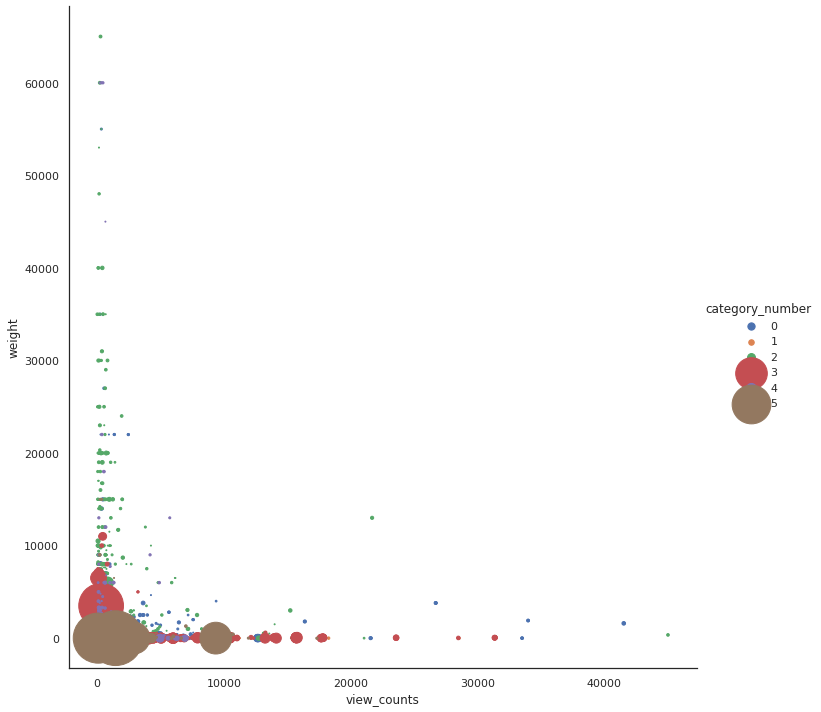

In [35]:
dados["category_number"].value_counts()
sns.FacetGrid(dados, hue="category_number", size=10) \
   .map(plt.scatter, "view_counts", "weight", "minimum_quantity") \
   .add_legend();




In [54]:

dados


,index,price,weight,view_counts,minimum_quantity,category,category_number
0,0,171.890000,1200.0,244,4,Decoração,2
1,1,77.670000,8.0,124,5,Papel e Cia,5
2,2,73.920006,2709.0,59,1,Outros,4
3,3,118.770004,0.0,180,1,Bebê,0
4,4,191.810000,507.0,34,6,Decoração,2
...,...,...,...,...,...,...,...
38502,38502,71.200000,706.0,315,4,Decoração,2
38503,38503,14.650000,7.0,1288,26,Lembrancinhas,3
38504,38504,11.580000,25.0,306,104,Lembrancinhas,3
38505,38505,131.330000,0.0,55,11,Lembrancinhas,3


In [58]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = dados[['price', 'weight', 'view_counts', 'minimum_quantity']]
y= dados['category_number']
X=X.fillna(X.mean())
y=y.fillna(y.mean())
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)


In [59]:
print(X_scaled.sample(5))

          price    weight  view_counts  minimum_quantity
23668 -0.386937 -0.193379     0.915276         -0.036478
34033  0.779244 -0.193928    -0.159917         -0.242106
35798 -0.329241 -0.193928    -0.259459          0.237693
19398  0.616781 -0.196127    -0.227690         -0.242106
25288  0.169808 -0.198875    -0.344881         -0.310648


In [76]:
from sklearn.cluster import KMeans

nclusters = 4 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)


In [77]:
print(y_cluster_kmeans)

[0 0 0 ... 0 0 0]


In [78]:
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)

In [79]:
print(score)

0.9139425166649077


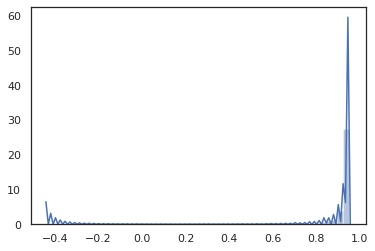

In [80]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores)
plt.show()

In [69]:
from sklearn.decomposition import PCA

ndimensions = 4

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)


In [70]:
X_pca_array

array([[ 0.66584803, -0.17716471,  0.10151543, -0.05553353],
       [-0.07162747, -0.40289444, -0.05307793,  0.07132317],
       [ 0.91458757, -0.17494978,  0.2878735 , -0.96492124],
       ...,
       [-1.02409936,  0.87547793,  1.58362906,  0.17101988],
       [ 0.05411944, -0.35490269,  0.10751158,  0.2749549 ],
       [-0.3499448 , -0.33053064, -0.0289581 , -0.16372844]])

In [71]:
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2', 'PC3', 'PC4']) # PC=principal component
X_pca.sample(5)
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans

[1 0 1 ... 0 0 0]


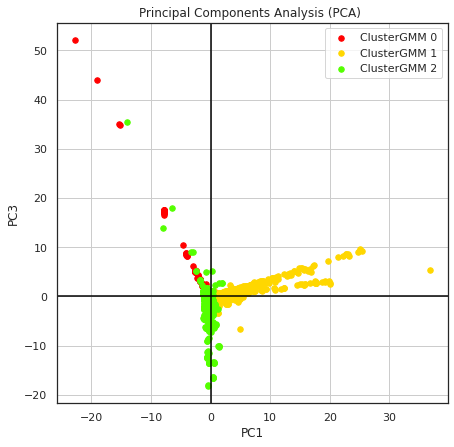

In [75]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC3',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) ");

#plotData(df_plot, 'ClusterKmeans')

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
print(y_cluster_gmm)
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')
plt.show()

In [ ]:
#

from sklearn.cluster import KMeans

nclusters = 3 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
#

from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
# print(score)
# 0.41752235538931637

scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);
# plt.show()
'''
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Target'] = data['Target']
df_scores.hist(by='Target', column='SilhouetteScore', range=(0,1.0), bins=20);
sns.pairplot(df_scores, hue="Target", size=4);
plt.show()
'''

from sklearn.decomposition import PCA

ndimensions = 4

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)
df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Pneumonias e COVID Dataset");

plotData(df_plot, 'ClusterKmeans')

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')
plt.show()


from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y, y_cluster_kmeans)
#print(score)
# 0.30249448100077847
score = adjusted_rand_score(y, y_cluster_gmm)
#print(score)
# 0.30249448100077847
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
'''
0.30249448100077847
Number of parameters: 61
'''

yhat = model.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
'''
0.49395830158939497
MSE: 0.006
'''


# calculate aic for regression
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

# calculate akaike information criterion for a linear regression model
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# calculate aic for regression
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

# generate dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# define and fit the model on all data
model = LinearRegression()
model.fit(X, y)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the aic
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)
'''
Number of parameters: 3
MSE: 0.008
AIC: -481.039
'''

# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

# calculate bayesian information criterion for a linear regression model
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

# generate dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# define and fit the model on all data
model = LinearRegression()
model.fit(X, y)
# number of parameters
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)

'''
Number of parameters: 3
MSE: 0.010
BIC: -444.136
'''
'''
def fit_distribution(data):
	# estimate parameters
	mu = mean(data)
	sigma = std(data)
	print(mu, sigma)
	# fit distribution
	dist = norm(mu, sigma)
	return dist

Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)

# calculate priors
priory0 = len(Xy0) / len(X)
priory1 = len(Xy1) / len(X)
print(priory0, priory1)

X1y0 = fit_distribution(Xy0[:,0])
X2y0 = fit_distribution(Xy0[:,1])
# create PDFs for y==1
X1y1 = fit_distribution(Xy1[:,0])
X2y1 = fit_distribution(Xy1[:,1])

'''